# OASIS Infobyte Internship

# Intern - Mrinal Kumar

# Domain - Data Science

# Task - 4

# Task - Email Spam Detection with Machine Learning

# 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam (1).csv',encoding='latin-1')

In [3]:
df.head(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.size

27860

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
# drop last three column(Unnamed: 2, Unnamed: 3, Unnamed:4) because these columns contain 50, 12, 6 non-null value out of 5572.

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [9]:
df.sample(4)

,v1,v2
696,ham,"Aight, you close by or still down around alex'..."
1281,ham,Am I the only one who doesn't stalk profiles?
564,ham,"Fuck babe ... I miss you already, you know ? C..."
3145,ham,\SHIT BABE.. THASA BIT MESSED UP.YEH


In [10]:
# renaming the cols

df.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)

In [11]:
df.sample(4)

,Target,Text
2428,ham,She.s find. I sent you an offline message to k...
2306,ham,"Aight that'll work, thanks"
4710,ham,Huh so slow i tot u reach long ago liao... U 2...
443,ham,"Sorry, I'll call later"


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
df['Target'] = encoder.fit_transform(df['Target'])

In [14]:
df.head(4)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [15]:
# checking missing values

df.isnull().sum()

Target    0
Text      0
dtype: int64

In [16]:
# checking duplicated values

df.duplicated().sum()

403

In [17]:
# remove duplicate

df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

# EDA

In [20]:
df.head(6)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...


In [21]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

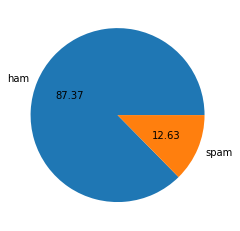

In [22]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

From above distribution Data is imbalanced

# 

Now we will see or do analysis on how many alphabets, words & sentences are used in sms/message/email And next for deeper analysis I will create three cols.: col. 
i) no. of characters in the sms/email
ii) no. of words in the sms/email 
iii) no. of sentences in the sms/mail for this work I have to import nltk

In [23]:
# NLTK (Natural Language Toolkit) is a popular library for working with human language data in Python. It provides a wide range 
#                                 of tools and resources for tasks such as tokenization, stemming, lemmatization, part-of-speech
#                                 tagging, parsing, semantic reasoning, and more.

!pip install nltk  

In [24]:
import nltk

In [25]:
# The nltk.download('punkt') command is used to download the 'punkt' resource from NLTK. The 'punkt' resource is a data package 
#                            that includes pre-trained models and tokenizers for various languages.

# Tokenization is the process of splitting text into individual tokens or words. NLTK's 'punkt' module provides a pre-trained 
#              tokenization model that can be used to tokenize text into sentences or words.

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mrinal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# see how to cal. no. of characters in sms/email
# then I store no. of character in new variable/col..

df['num_characters'] = df['Text'].apply(len)

In [27]:
df.head(4)

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [28]:
# now fetch no. of words
# now I will cal. length of each list
# store no. of words in new varialbe/col. num_words

df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head(4)

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13


In [30]:
# now fetch no. of sentences in single sms/mail
# now cal. len of each sentences
# store no. of sentence in new variable/col. num_sentences

df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head(4)

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


analyze ham and spam sms/mail separately

1) ham

In [33]:
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


2) spam

In [34]:
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

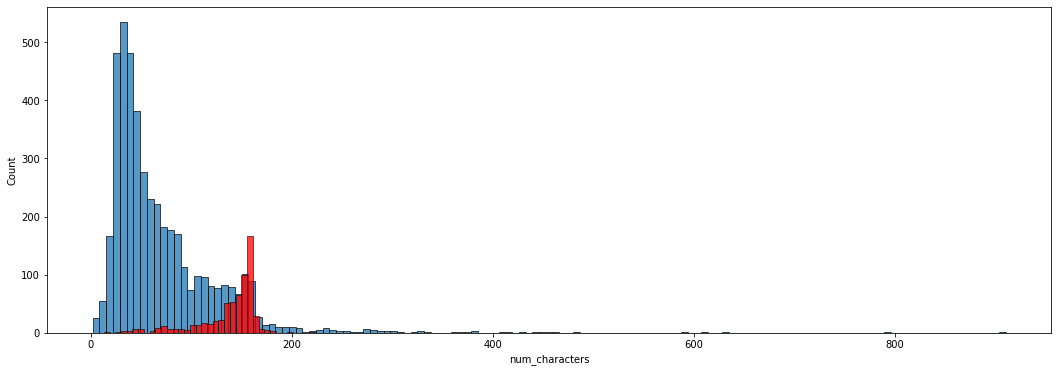

In [35]:
# plot histogram of ham and spam sms/email

plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'], color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

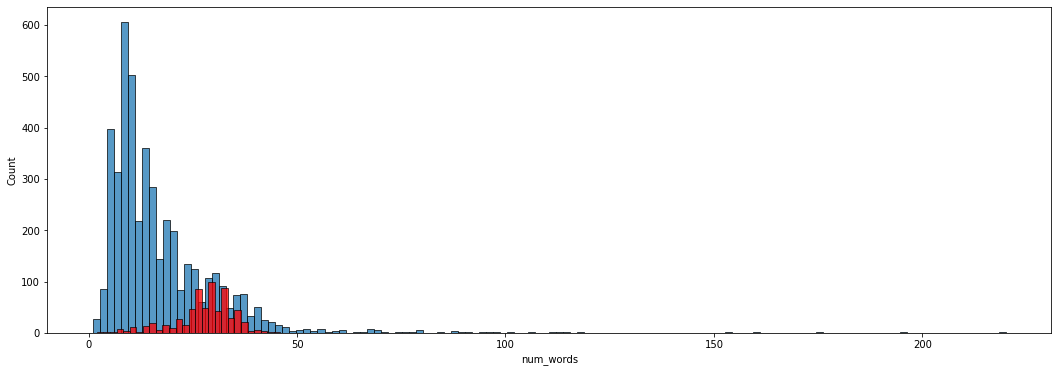

In [36]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'], color='red')

<AxesSubplot: xlabel='num_sentences', ylabel='Count'>

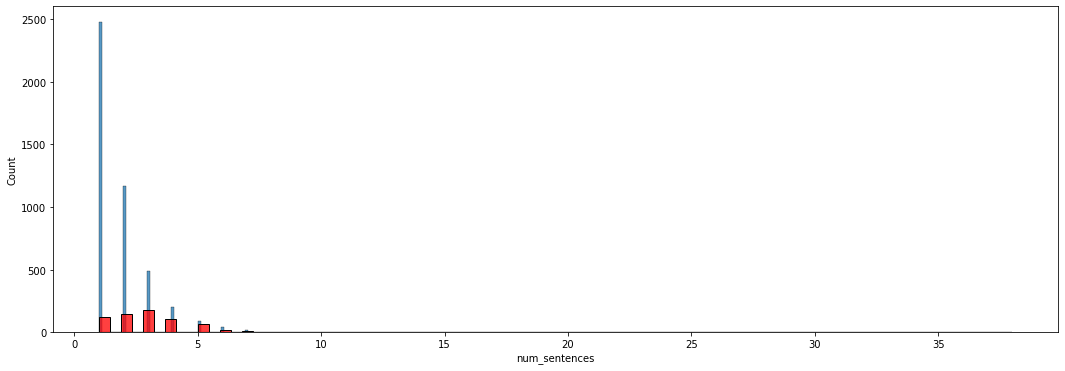

In [37]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'], color='red')

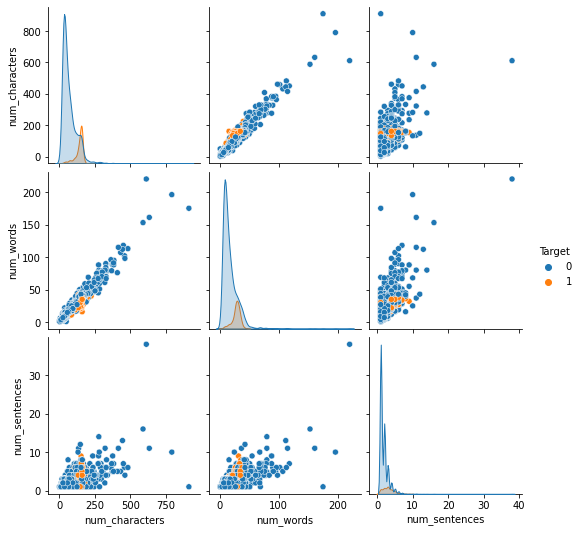

In [38]:
sns.pairplot(df, hue='Target')

In [39]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262969,0.267602
num_characters,0.384717,1.000000,0.965784,0.626118
num_words,0.262969,0.965784,1.000000,0.680882
num_sentences,0.267602,0.626118,0.680882,1.000000


<ipython-input-40-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

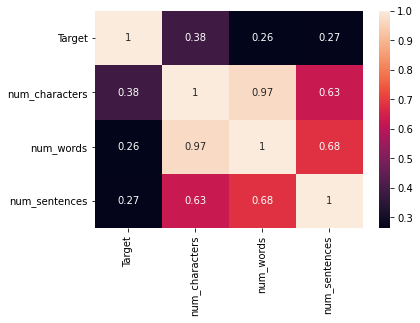

In [40]:
sns.heatmap(df.corr(), annot=True)

# Data/Text Preprocessing

i) Lower

ii) Tokenization

iii) Removing Special Character

iv) Removing stop words and punctuation

v) stemming

In [41]:
#Removing stop words and punctuation

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
# stemming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)        # y is a list of strings, you can use the " ".join(y) expression to join the elements of the
#                                         list into a single string separated by spaces.the elements of the y list are joined 
#                                         together using the " " (space) separator. 

In [45]:
# Now we add new variabe/col.(transform_text) in df
# I am appling teansform_text() on 'Text' col. of df
# I adding Transformed_Text col. in df

df['Transformed_Text'] = df['Text'].apply(transform_text)

In [46]:
df.head(4)

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [47]:
# word cloud --> show/display important word in big size
# now I create word cloud of spam message

!pip install wordcloud

In [48]:
!pip install --upgrade wordcloud

In [49]:
!pip install pillow

In [50]:
!pip install --upgrade pillow

In [51]:
# word cloud --> show/display important word in big size
# now I create word cloud of spam message

from wordcloud import WordCloud
from PIL import Image, ImageDraw, ImageFont
wc = WordCloud(width=800, height=800, min_font_size=10, background_color = 'white')

In [52]:
# for spam

spam_wc = wc.generate(df[df['Target']==1]['Transformed_Text'].str.cat(sep=" "))

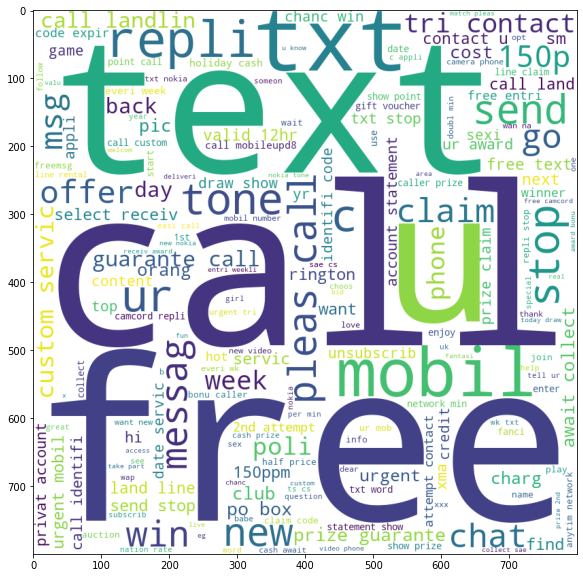

In [53]:
# for spam

plt.figure(figsize=(18,10))
plt.imshow(spam_wc)

In [54]:
# for ham

ham_wc = wc.generate(df[df['Target']==0]['Transformed_Text'].str.cat(sep=" "))

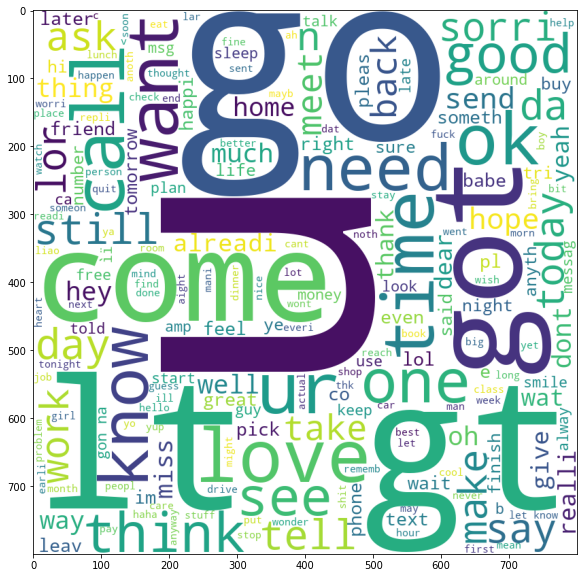

In [55]:
plt.figure(figsize=(18,10))
plt.imshow(ham_wc)

Now let's see Top 30 words used in spam and ham

In [56]:
df.head(5)

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
# top 30 words in spam(Target=1) for that we have to select spam msg from Transformed_Text col.
# this msgs are in series form, tolist() convert series tnto list
# # each msg is item, it is a list of strings
# now we will split each word for that I am using msg.split()
# now here after splitting each word I create spam_corpus empty list and each splitted word in spam_corpus
spam_corpus=[]   
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [59]:
len(spam_corpus)

9939

In [60]:
# let create dictionary for each word

# Counter--> is an unordered collection where elements are stored as Dict keys and their count as dict value. Counter elements 
#    count can be positive, zero or negative integers. However there is no restriction on it's keys and values. Although values 
#    are intended to be numbers but we can store other objects too.

# Counter --> It's a dictionary that stores objects as keys and counts as values.

from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [61]:
# shows most common 30 words in spam msg.

from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [62]:
# put most common words in dataframe

from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\Mrinal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


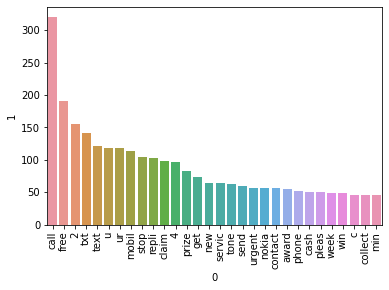

In [63]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
# Top 30 words from ham

ham_corpus=[]
for msg in df[df['Target']==0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\Mrinal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


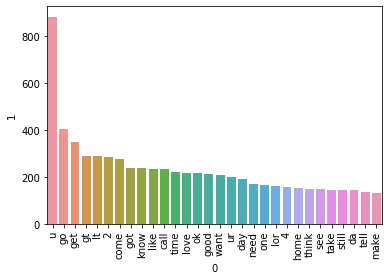

In [65]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [66]:
from sklearn.feature_extraction.text import CountVectorizer # Countvectorizer is a method to convert text to numerical data.
cv = CountVectorizer()                                      #                 We are using a bag of words i.e. Count Vectorizer
                                                            #                 a class in the sklearn library to extract the 
                                                            #                 features from the sentences. It is used to count
                                                            #                 the frequency of the word that occurs in the 
                                                            #                 sentence. In a bag of words, the numbers are given
                #                                           #                 to every word and give importance to all words.

In [67]:
X = cv.fit_transform(df['Transformed_Text']).toarray() # .toarray()--> used to convert sparse array to dense array

In [68]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
X.shape 

(5169, 6708)

5169 --> sms, 6708 --> words

In [70]:
y = df['Target'].values # The values() function in Python is used to retrieve all of the values inside a dictionary. This 
                        #              function doesn't take any parameters and gives a list of values inside a dictionary.
                        #              If a dictionary has no value, this function returns a null dictionary.

In [71]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Naive Bayes because naive bayes perform good with textual data

In [73]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [74]:
gnb = GaussianNB()  # Gaussian Naive Bayes (GNB) is a classification technique used in Machine Learning (ML) based on the 
                    #                            probabilistic approach and Gaussian distribution. Gaussian Naive Bayes assumes
                    #                            that each parameter (also called features or predictors) has an independent
                    #                            capacity of predicting the output variable.
            
                    # Gaussian Distribution is also called Normal distribution.

In [75]:
mnb = MultinomialNB() # The multinomial naïve Bayes is widely used for assigning documents to classes based on the statistical
                      #                              analysis of their contents. It provides an alternative to the "heavy" 
                      #                              AI-based semantic analysis and drastically simplifies textual data
                      #                              classification.
            
                      # MultinomialNB works with occurrence counts

In [76]:
bnb = BernoulliNB()   # Bernoulli Naive Bayes is a part of the Naive Bayes family. It is based on the Bernoulli Distribution and
                    #                       accepts only binary values, i.e., 0 or 1. If the features of the dataset are binary,
                    #                       then we can assume that Bernoulli Naive Bayes is the algorithm to be used.
        
                    # BernoulliNB is designed for binary/boolean features.

In [77]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [78]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [79]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [81]:
X_tfidf = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [82]:
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
X_tfidf.shape

(5169, 6708)

In [84]:
y_tfidf = df['Target'].values

In [85]:
y_tfidf

array([0, 0, 1, ..., 0, 0, 0])

In [86]:
y_tfidf.shape

(5169,)

In [87]:
from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=2)

In [88]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [89]:
gnb.fit(X_train_tfidf, y_train_tfidf)
y_pred_gnb_tfidf = gnb.predict(X_test_tfidf)
print(accuracy_score(y_test_tfidf, y_pred_gnb_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_gnb_tfidf))
print(precision_score(y_test_tfidf, y_pred_gnb_tfidf))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [90]:
mnb.fit(X_train_tfidf, y_train_tfidf)
y_pred_mnb_tfidf = mnb.predict(X_test_tfidf)
print(accuracy_score(y_test_tfidf, y_pred_mnb_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_mnb_tfidf))
print(precision_score(y_test_tfidf, y_pred_mnb_tfidf))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [91]:
bnb.fit(X_train_tfidf, y_train_tfidf)
y_pred_bnb_tfidf = bnb.predict(X_test_tfidf)
print(accuracy_score(y_test_tfidf, y_pred_bnb_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_bnb_tfidf))
print(precision_score(y_test_tfidf, y_pred_bnb_tfidf))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
